In [1]:
import numpy as np
import pandas as pd 

In [2]:
human  = pd.read_csv("human.csv")

In [3]:
human

Sequence  Class
0     ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...      4
1     ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...      4
2     ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
3     ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
4     ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...      3
...                                                 ...    ...
4375  ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...      0
4376  ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...      6
4377  ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...      6
4378  ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...      6
4379  ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...      6

[4380 rows x 2 columns]

In [4]:
def Kmers(seq, size=6):
    return [seq[x:x+size] for x in range(len(seq)-size+1)]

In [5]:
human["human_kmers"] = human["Sequence"].apply(Kmers)

In [6]:
human.drop("Sequence", axis = 1, inplace = True)

In [7]:
human

Class                                        human_kmers
0         4  [ATGCCC, TGCCCC, GCCCCA, CCCCAA, CCCAAC, CCAAC...
1         4  [ATGAAC, TGAACG, GAACGA, AACGAA, ACGAAA, CGAAA...
2         3  [ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA...
3         3  [ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA...
4         3  [ATGCAA, TGCAAC, GCAACA, CAACAG, AACAGC, ACAGC...
...     ...                                                ...
4375      0  [ATGGAA, TGGAAG, GGAAGA, GAAGAT, AAGATT, AGATT...
4376      6  [ATGCAG, TGCAGT, GCAGTC, CAGTCC, AGTCCT, GTCCT...
4377      6  [ATGCAG, TGCAGT, GCAGTC, CAGTCC, AGTCCT, GTCCT...
4378      6  [ATGGGG, TGGGGC, GGGGCA, GGGCAC, GGCACC, GCACC...
4379      6  [ATGCAG, TGCAGT, GCAGTC, CAGTCC, AGTCCT, GTCCT...

[4380 rows x 2 columns]

In [8]:
y_human = human["Class"].values 

In [9]:
y_human


array([4, 4, 3, ..., 6, 6, 6])

In [11]:
human_text = list(human["human_kmers"])

In [12]:
len(human_text)

4380

In [13]:
for item in range(len(human_text)):
    human_text[item] = " ".join(human_text[item])

In [14]:
human_text

['ATGCCC TGCCCC GCCCCA CCCCAA CCCAAC CCAACT CAACTA AACTAA ACTAAA CTAAAT TAAATA AAATAC AATACT ATACTA TACTAC ACTACC CTACCG TACCGT ACCGTA CCGTAT CGTATG GTATGG TATGGC ATGGCC TGGCCC GGCCCA GCCCAC CCCACC CCACCA CACCAT ACCATA CCATAA CATAAT ATAATT TAATTA AATTAC ATTACC TTACCC TACCCC ACCCCC CCCCCA CCCCAT CCCATA CCATAC CATACT ATACTC TACTCC ACTCCT CTCCTT TCCTTA CCTTAC CTTACA TTACAC TACACT ACACTA CACTAT ACTATT CTATTC TATTCC ATTCCT TTCCTC TCCTCA CCTCAT CTCATC TCATCA CATCAC ATCACC TCACCC CACCCA ACCCAA CCCAAC CCAACT CAACTA AACTAA ACTAAA CTAAAA TAAAAA AAAAAT AAAATA AAATAT AATATT ATATTA TATTAA ATTAAA TTAAAC TAAACA AAACAC AACACA ACACAA CACAAA ACAAAC CAAACT AAACTA AACTAC ACTACC CTACCA TACCAC ACCACC CCACCT CACCTA ACCTAC CCTACC CTACCT TACCTC ACCTCC CCTCCC CTCCCT TCCCTC CCCTCA CCTCAC CTCACC TCACCA CACCAA ACCAAA CCAAAG CAAAGC AAAGCC AAGCCC AGCCCA GCCCAT CCCATA CCATAA CATAAA ATAAAA TAAAAA AAAAAT AAAATA AAATAA AATAAA ATAAAA TAAAAA AAAAAA AAAAAT AAAATT AAATTA AATTAT ATTATA TTATAA TATAAC ATAACA TAACAA AACAAA ACAA

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))


In [16]:
X_human = cv.fit_transform(human_text)

In [17]:
X_human.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_human, y_human, test_size = 0.2, random_state=0)

In [19]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)


MultinomialNB(alpha=0.1)

In [21]:
y_test

array([3, 6, 6, 6, 3, 6, 6, 6, 4, 1, 6, 6, 6, 3, 6, 6, 6, 6, 6, 6, 0, 3,
       4, 3, 1, 5, 0, 3, 3, 6, 6, 6, 5, 4, 3, 6, 4, 3, 1, 6, 0, 0, 3, 4,
       6, 2, 1, 6, 6, 1, 4, 6, 6, 4, 0, 3, 3, 6, 4, 6, 6, 5, 3, 6, 3, 6,
       5, 1, 6, 6, 5, 1, 6, 6, 3, 0, 6, 3, 5, 4, 6, 2, 5, 3, 1, 5, 2, 6,
       4, 1, 4, 3, 6, 4, 2, 1, 6, 3, 3, 4, 4, 6, 3, 6, 0, 4, 1, 2, 3, 6,
       0, 6, 6, 0, 3, 1, 4, 6, 4, 5, 3, 3, 0, 6, 5, 6, 6, 0, 0, 2, 4, 1,
       2, 6, 3, 3, 0, 6, 6, 3, 4, 1, 4, 3, 1, 6, 3, 0, 6, 5, 0, 1, 6, 4,
       6, 6, 5, 6, 2, 4, 1, 0, 2, 4, 1, 0, 6, 6, 3, 3, 6, 6, 0, 4, 1, 4,
       0, 6, 2, 0, 6, 0, 5, 3, 1, 5, 1, 0, 6, 0, 0, 6, 6, 6, 0, 3, 4, 6,
       4, 2, 6, 1, 3, 6, 6, 3, 2, 6, 3, 1, 3, 4, 3, 1, 6, 0, 1, 1, 0, 6,
       6, 6, 6, 5, 0, 4, 4, 1, 4, 6, 5, 3, 6, 1, 5, 6, 6, 2, 4, 3, 3, 6,
       4, 1, 2, 3, 6, 6, 4, 6, 1, 1, 3, 2, 4, 6, 6, 6, 0, 4, 6, 3, 4, 0,
       3, 3, 6, 4, 4, 6, 6, 6, 0, 6, 3, 6, 6, 3, 0, 3, 3, 2, 6, 6, 4, 3,
       2, 6, 6, 2, 1, 1, 0, 6, 3, 1, 6, 1, 6, 5, 6,

In [22]:
pred = classifier.predict(X_test)
pred

array([3, 6, 6, 6, 3, 6, 6, 6, 4, 1, 6, 6, 6, 3, 6, 6, 6, 6, 6, 6, 0, 3,
       4, 3, 1, 5, 0, 6, 6, 6, 6, 6, 5, 4, 3, 6, 4, 3, 1, 6, 0, 0, 3, 4,
       6, 2, 1, 6, 6, 1, 4, 6, 6, 4, 0, 3, 3, 6, 4, 6, 6, 5, 3, 6, 3, 6,
       5, 1, 6, 6, 5, 1, 6, 6, 3, 0, 6, 3, 5, 4, 6, 2, 5, 3, 1, 5, 2, 6,
       4, 1, 4, 3, 6, 4, 2, 1, 6, 3, 3, 4, 6, 6, 3, 6, 0, 4, 1, 2, 3, 6,
       0, 6, 6, 0, 3, 1, 4, 6, 4, 5, 3, 3, 0, 6, 5, 6, 6, 0, 0, 2, 4, 1,
       2, 6, 3, 3, 0, 6, 6, 3, 4, 1, 4, 3, 1, 6, 3, 0, 6, 5, 0, 1, 6, 4,
       6, 6, 5, 6, 2, 4, 1, 0, 2, 0, 1, 0, 6, 6, 3, 3, 6, 6, 0, 4, 1, 6,
       0, 6, 2, 0, 6, 0, 5, 3, 1, 5, 1, 0, 6, 0, 0, 6, 6, 6, 0, 3, 4, 6,
       4, 2, 6, 1, 3, 6, 6, 3, 2, 6, 3, 1, 3, 4, 3, 1, 6, 0, 1, 1, 0, 4,
       6, 6, 6, 5, 6, 4, 4, 1, 4, 6, 5, 3, 6, 1, 5, 6, 6, 2, 4, 3, 3, 6,
       4, 1, 2, 3, 6, 6, 4, 6, 1, 1, 3, 2, 4, 6, 6, 6, 0, 4, 6, 3, 4, 0,
       3, 3, 6, 4, 4, 6, 6, 6, 0, 6, 3, 6, 6, 3, 0, 3, 3, 2, 6, 6, 4, 3,
       2, 6, 6, 2, 1, 1, 0, 6, 3, 1, 6, 1, 6, 5, 6,

In [23]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true=y_test, y_pred=pred)


In [24]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, pred)

In [25]:
cm

array([[ 96,   0,   0,   0,   0,   0,   1],
       [  0, 101,   0,   1,   0,   0,   1],
       [  0,   0,  61,   0,   0,   0,   2],
       [  0,   0,   0, 133,   0,   0,   3],
       [  3,   0,   0,   0, 142,   0,  10],
       [  0,   0,   0,   0,   0,  48,   0],
       [  1,   0,   0,   0,   2,   0, 271]])

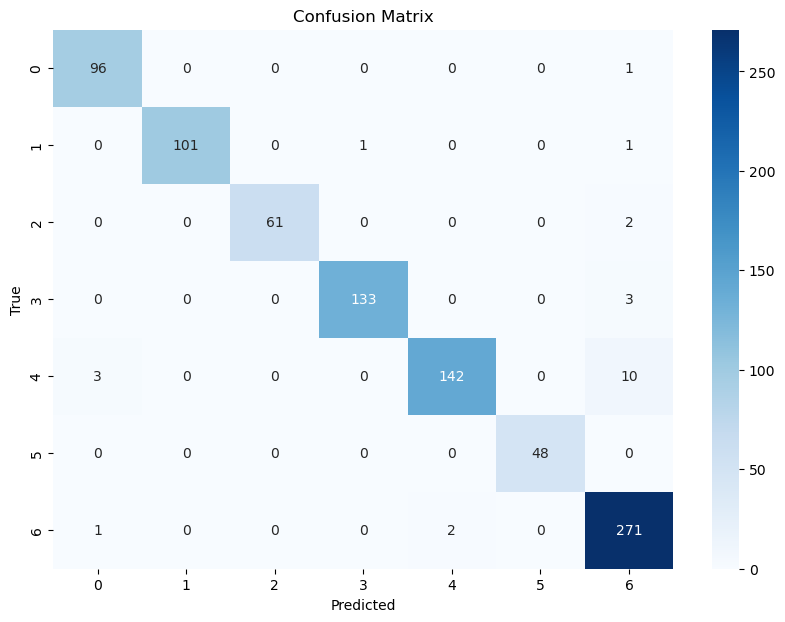

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [27]:
mae

0.0821917808219178

In [ ]:
report = classification_report(y_test, pred, output_dict=True)

In [ ]:
report

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
corpus = [
    'This is the first document document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

X = vectorizer.fit_transform(corpus)


In [ ]:
# Access the vocabulary (list of words)
vocab = vectorizer.get_feature_names_out()

# Transform new data
new_data = ['This is the new document.']
new_X = vectorizer.transform(new_data)


In [ ]:
new_X

In [ ]:
new_X.shape

In [ ]:
new_X.toarray()

In [ ]:
X.toarray()

In [ ]:
vocab

In [ ]:
df = pd.DataFrame(X.toarray())

In [ ]:
df.columns = vocab

In [ ]:
df